# 📘 Day 1 — Linear Algebra in Action
### Topic: User-Item Recommendation via Cosine Similarity
### Goal: Apply vector & matrix math to a real-world recommender system

In [1]:
%pip install pandas numpy seaborn matplotlib scikit-learn

  Using cached pandas-2.3.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.3-cp312-cp312-win_amd64.whl (11.0 MB)
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
    --------------------------------------- 0.3/12.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.8 MB 1.2 MB/s eta 0:00:11
   -- ------------------------------------- 0.8/12.8 MB 1.0 MB/s eta 0:00:12
   --- ------------------------------------ 1.0/12.8 MB 1.1 MB/s eta 0:00:11
   --- ------------------------------------ 1.0/12.8 MB 1.1 MB/s eta 0:00:11
   ---- ----------------------------------- 1.3/12.8 MB 1.0 MB/s eta 0:00:12
   ---- ----------------------------------- 1.6/12.8 MB 1.0 MB/s eta 0:00:11
   ----- ---------------------------------- 1.8/12.8 MB 1.1 MB

In [ ]:
#  Step 1: Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

sns.set_theme(style='whitegrid', palette='pastel', font_scale=1.1)

In [4]:
#  Step 2: Create a user-item rating matrix
ratings = pd.DataFrame({
    'User1': [5, 3, 0, 1, 0],
    'User2': [4, 0, 0, 1, 2],
    'User3': [0, 0, 5, 4, 4],
    'User4': [2, 3, 4, 0, 0]
}, index=['MovieA', 'MovieB', 'MovieC', 'MovieD', 'MovieE'])

print(' User-Item Rating Matrix')
display(ratings)

 User-Item Rating Matrix


,User1,User2,User3,User4
MovieA,5,4,0,2
MovieB,3,0,0,3
MovieC,0,0,5,4
MovieD,1,1,4,0
MovieE,0,2,4,0


In [5]:
#  Step 3: Compute user-to-user similarity using cosine similarity
similarity_matrix = pd.DataFrame(
    cosine_similarity(ratings.T),
    index=ratings.columns,
    columns=ratings.columns
)

print(' Cosine Similarity Between Users')
display(similarity_matrix)

 Cosine Similarity Between Users


,User1,User2,User3,User4
User1,1.000000,0.774597,0.089555,0.596377
User2,0.774597,1.000000,0.346844,0.324176
User3,0.089555,0.346844,1.000000,0.491919
User4,0.596377,0.324176,0.491919,1.000000


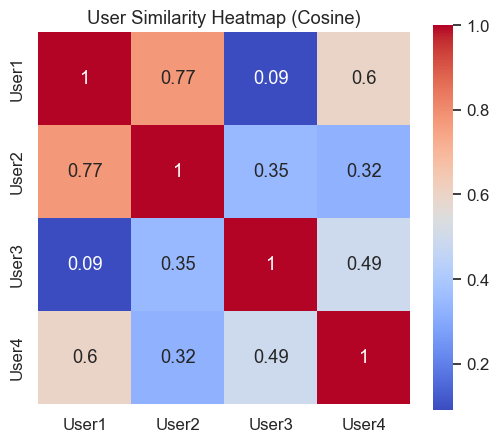

In [6]:
#  Step 4: Visualize similarity as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('User Similarity Heatmap (Cosine)')
plt.show()

# Simple Recommendation system
- Compute cosine similarity between all users (based on their movie ratings).

- Pick the most similar user to the target (User1 in this case).

- Recommend movies that the similar user rated > 3 but the target user hasn’t watched yet (rated = 0).

In [13]:
#  Step 5: Generate a simple recommendation
target_user = 'User1'

similar_users = similarity_matrix[target_user].sort_values(ascending=False)[1:]
most_similar_user = similar_users.index[0]

recommendations = ratings.loc[
    (ratings[target_user] == 0) & (ratings[most_similar_user] > 3)
].index.tolist()

print(f' Target User: {target_user}')
print(f' Most Similar User: {most_similar_user}')
print(f' Recommended Items: {recommendations if recommendations else "None! No recommendations available." }')

 Target User: User1
 Most Similar User: User2
 Recommended Items: None! No recommendations available.


# Recommending Movies using Predictive Filtering:
- The more similar a user, the more weight their rating gets.

- If a movie is liked by several similar users, it scores higher.

- You can then recommend the top N movies by predicted rating.

In [12]:
# 🔹 Step 5: Generate smarter recommendations using weighted similarity

target_user = 'User1'
similar_users = similarity_matrix[target_user].sort_values(ascending=False)[1:]  # exclude self

# Get movies the target user hasn’t rated
unseen_movies = ratings[ratings[target_user] == 0].index

predicted_scores = {}

# For each unseen movie, predict rating based on all similar users
for movie in unseen_movies:
    weighted_sum = 0
    sim_sum = 0
    for other_user, sim_score in similar_users.items():
        rating = ratings.loc[movie, other_user]
        if rating > 0:  # only consider movies actually rated by that user
            weighted_sum += sim_score * rating
            sim_sum += sim_score
    if sim_sum > 0:
        predicted_scores[movie] = weighted_sum / sim_sum

# Sort by predicted rating
sorted_recommendations = sorted(predicted_scores.items(), key=lambda x: x[1], reverse=True)

# 🎯 Output
print(f"Target User: {target_user}")

if sorted_recommendations:
    print("Recommended Items (with predicted ratings):")
    for movie, score in sorted_recommendations:
        print(f"  {movie}: {score:.2f}")
else:
    print("Recommended Items: None (need more data!)")


Target User: User1
Recommended Items (with predicted ratings):
  MovieC: 4.13
  MovieE: 2.21


# Reflection Notes — Day 1

1️⃣ What did I observe about cosine similarity?

- It finds the similarity score between two vectors/items/users
- Similarity score : 
    1 → same direction → identical preferences

    0 → perpendicular → unrelated preferences

    -1 → opposite direction → completely opposite tastes


2️⃣ How does the dot product relate to similarity between users/items?

The dot product measures how much two vectors point in the same direction.
Cosine similarity is actually derived from the dot product.
Dot product = raw overlap
Cosine similarity = normalized overlap (true directional similarity)


3️⃣ If this were Netflix or Spotify, what would each vector represent?

List of movies user watched and their ratings if netflix and it's songs if netflix.
We can sort similar users and recommend them next movies for the user who didn't watch those movies/songs based on the similar user's rating.

4️⃣ How could embeddings make this system smarter?

Embeddings are dense numerical representations learned by machine learning models .
Instead of using raw ratings or binary values, embeddings capture semantic meaning — patterns hidden in large data.

In a recommendation context:

User embeddings represent preferences.

Item embeddings represent content or attributes.

The model learns these embeddings so that similar users/items end up close together in this embedding space.

Then cosine similarity is computed between embeddings, which now encode much deeper relationships (e.g., two movies with similar genres, actors, or moods will have close embeddings even if they’ve never been co-rated).

So, embeddings make recommendations:
More accurate
More generalizable (can recommend unseen items)
More context-aware
